<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Этап-1.-Подготовка" data-toc-modified-id="Этап-1.-Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Этап 1. Подготовка</a></span><ul class="toc-item"><li><span><a href="#Этап-1.1-Загрузка-и-изучение-данных" data-toc-modified-id="Этап-1.1-Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Этап 1.1 Загрузка и изучение данных</a></span></li><li><span><a href="#Этап-1.2-Предобработка-данных" data-toc-modified-id="Этап-1.2-Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Этап 1.2 Предобработка данных</a></span></li></ul></li><li><span><a href="#Этап-2.-Обучение" data-toc-modified-id="Этап-2.-Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Этап 2. Обучение</a></span><ul class="toc-item"><li><span><a href="#Этап-2.1-Деление-на-выборки,-выделение-признаков-и-целевого-признака" data-toc-modified-id="Этап-2.1-Деление-на-выборки,-выделение-признаков-и-целевого-признака-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Этап 2.1 Деление на выборки, выделение признаков и целевого признака</a></span></li><li><span><a href="#Этап-2.2-Преобразование-слов-в-векторы-и-оценка-важности-слов-в-тексте" data-toc-modified-id="Этап-2.2-Преобразование-слов-в-векторы-и-оценка-важности-слов-в-тексте-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Этап 2.2 Преобразование слов в векторы и оценка важности слов в тексте</a></span></li><li><span><a href="#Этап-2.3-Обучение-модели-логистической-регрессии-LogisticRegression()" data-toc-modified-id="Этап-2.3-Обучение-модели-логистической-регрессии-LogisticRegression()-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Этап 2.3 Обучение модели логистической регрессии LogisticRegression()</a></span></li><li><span><a href="#Этап-2.4-Обучение-модели-градиентного-бустинга-LGBMClassifier()" data-toc-modified-id="Этап-2.4-Обучение-модели-градиентного-бустинга-LGBMClassifier()-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Этап 2.4 Обучение модели градиентного бустинга LGBMClassifier()</a></span></li></ul></li><li><span><a href="#Этап-3.-Выводы" data-toc-modified-id="Этап-3.-Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Этап 3. Выводы</a></span></li></ul></div>

<div style='border:solid green 5px; padding: 40px'>

# <font color='darkgreen'>**Проект по разработке модели для классификации комментариев**</font>
    
</div>

_**Цель проекта: разработать модель для классификации комментариев на негативные и позитивные.**_

**Описание проекта:**

_Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. В нашем распоряжении есть набор данных с разметкой о токсичности правок. Нужно обучить модель классифицировать комментарии на позитивные и негативные._

_Значение метрики **F1** на тестовой выборке должно быть не меньше **0.75**._ 

## Этап 1. Подготовка

### Этап 1.1 Загрузка и изучение данных

In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
# импорты из стандартной библиотеки
import warnings

# импорты сторонних библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

# импорты модулей текущего проекта
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from pprint import pprint

from time import time

from lightgbm import LGBMClassifier

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud

nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')

# настройки
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\efimo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\efimo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\efimo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# откроем файл 

try:
    data = pd.read_csv('toxic_comments.csv')
except:
    data = pd.read_csv('/datasets/toxic_comments.csv')

In [5]:
# посмотрим первые строки датафрейма

data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
# посмотрим основную информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В данных имеется столбец text, который содержит текстовые комментарии, - для модели это признак. И столбец toxic, содержащий отметку "1", если комментарий классифицирован как токсичный, и отметку "0", если комментарий позитивный, — это целевой признак.

In [7]:
# так как это задача классификации, посмотрим на баланс классов в целевом признаке

data.toxic.value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

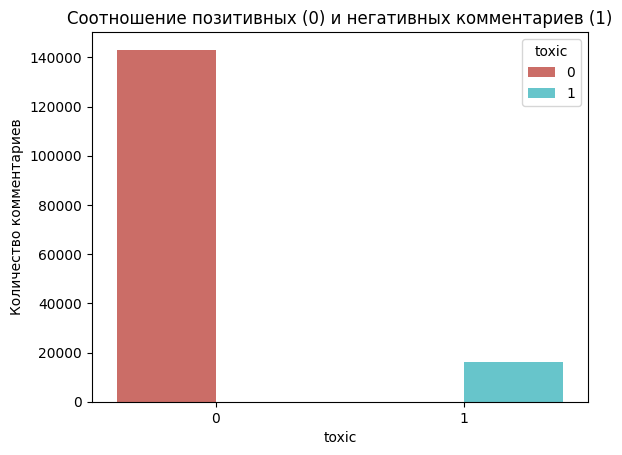

In [8]:
# посмотрим на графике соотношение позитивных и негативных комментариев

countplot = sns.countplot(data=data, x='toxic', palette='hls', hue = 'toxic')
countplot.set_title('Соотношение позитивных (0) и негативных комментариев (1)')
countplot.set_ylabel('Количество комментариев')
plt.show()

In [9]:
# посчитаем соотношение позитивных и негативных комментариев

ratio = data.query('toxic == 0').count() / data.query('toxic == 1').count()
ratio

Unnamed: 0    8.841344
text          8.841344
toxic         8.841344
dtype: float64

В целевом признаке есть дисбаланс классов: позитивных комментариев почти в 9 раз больше, чем негативных.

### Этап 1.2 Предобработка данных

In [10]:
# добавим столбец lemm_text, который изначально идентичен text
# все преобразования будем делать с lemm_text

data['lemm_text'] = data['text']
data.head()

,Unnamed: 0,text,toxic,lemm_text
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...
1,1,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...
2,2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It..."
3,3,"""\nMore\nI can't make any real suggestions on ...",0,"""\nMore\nI can't make any real suggestions on ..."
4,4,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember..."


In [11]:
# приведем все слова к нижнему регистру

data.lemm_text = data.lemm_text.str.lower()

In [12]:
# напишем функцию, очищающую текст от лишних знаков и цифр

def clear_text(text):
    return " ".join(re.sub(u'[^a-z]', ' ', text).split())

In [13]:
# очистим все тексты от лишних знаков и цифр

data.lemm_text = data.lemm_text.apply(clear_text)

In [14]:
# напишем функцию, разделяющую текст на слова и лемматизирующую их

def lemmatize(text):
    wnl = WordNetLemmatizer()
    words = text.split()
    lemm_list = []
    for word in words:
        lemm_list.append(wnl.lemmatize(word))
    return ' '.join(lemm_list)

In [15]:
# лемматизируем тексты

data.lemm_text = data.lemm_text.apply(lemmatize)

In [16]:
# посмотрим, что получилось

display(data.head())
display(data.lemm_text[0])

,Unnamed: 0,text,toxic,lemm_text
0,0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestion on impro...
4,4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalism just closure on some gas after i voted at new york doll fac and please don t remove the template from the talk page since i m retired now'

In [17]:
# объединим строки в столбце lemm_text

text_for_cloud = ' '.join(data['lemm_text'])

In [18]:
# сгенерируем облако слов из всего текста

wordcloud = WordCloud().generate(text_for_cloud)

(-0.5, 399.5, 199.5, -0.5)

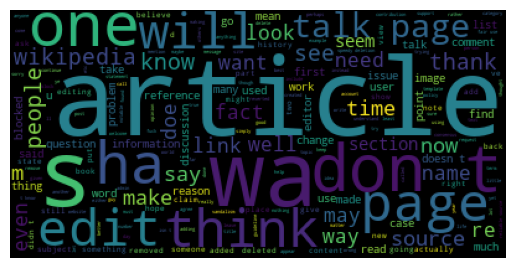

In [19]:
# посмотрим на облако слов

plt.imshow(wordcloud);
plt.axis('off')

Далее, чтобы посмотреть статистику слов и посмотреть на графике частоту распределения слов с помощью библиотеки NLTK, нужно преобразовать текст к классу Text.

In [20]:
# разобьем текст на токены слов

lemm_text_tokens = word_tokenize(text_for_cloud)

In [21]:
# преобразование текстов к классу Text

nltktext = nltk.Text(lemm_text_tokens)

In [22]:
# для подсчёта статистики распределения частот слов в тексте применим класс FreqDist (frequency distributions)

fdist = FreqDist(nltktext)
fdist

FreqDist({'the': 496106, 'to': 296741, 'a': 294215, 'i': 240071, 'of': 224547, 'and': 223635, 'you': 218170, 'is': 176038, 'that': 160449, 'it': 159754, ...})

Класс FreqDist содержит встроенный метод plot для построения такого графика. Необходимо указать количество токенов, частоты которых будут показаны на графике. С параметром cumulative=False график иллюстрирует закон Ципфа: если все слова достаточно длинного текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n.

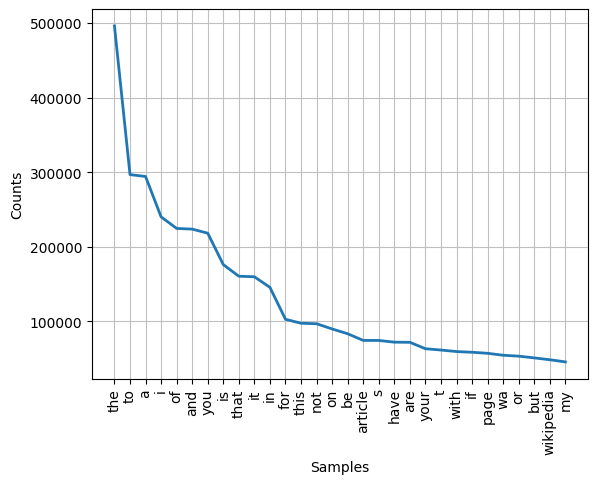

In [23]:
# посмотрим на графике 30 токенов

fdist.plot(30,cumulative=False);

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 1:**

В датафрейме 159292 строки. Столбец **text** содержит текстовый комментарий. Столбец **toxic** - целевой признак - классифицирует его как позитивный (0) или негативный (1). Выявлен дисбаланс классов в пользу позитивных комментариев почти в 8.84 раза. 
    
В процессе предобработки был создан столбец lemm_text, комментарии в котором были очищены от лишних знаков и лемматизированы для облегчения последующего обучения модели. 

</div>

## Этап 2. Обучение

### Этап 2.1 Деление на выборки, выделение признаков и целевого признака

In [24]:
# разделим данные на две выборки с учетом дисбаланса классов целевого признака

data_train, data_test = train_test_split(data, test_size=0.25, random_state=12345, stratify=data.toxic)

In [25]:
# посмотрим размер выборок

print(data_train.shape)
print(data_test.shape)

(119469, 4)
(39823, 4)


In [26]:
# выделим обучающие признаки

corpus_train = data_train.lemm_text
corpus_test = data_test.lemm_text

In [27]:
# выделим целевой признак

target_train = data_train.toxic
target_test = data_test.toxic

### Этап 2.2 Преобразование слов в векторы и оценка важности слов в тексте

Оценим частоту и важность слов с помощью класса TfidfVectorizer(). Передадим ему список стоп-слов.

In [28]:
# стоп-слова из библиотеки nltk

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
# создадим счётчик TF-IDF

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

In [30]:
count_tf_idf

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [31]:
# чтобы посчитать TF-IDF для обучающей выборки (корпуса текстов), вызовем функцию fit_transform

tf_idf_train = count_tf_idf.fit_transform(corpus_train)

In [32]:
# посмотрим, что получилось

print(tf_idf_train[:1])

  (0, 85569)	0.13997780129002418
  (0, 115145)	0.1476838682457421
  (0, 97870)	0.2312076531190372
  (0, 69831)	0.2128433340761919
  (0, 93808)	0.3040678850338673
  (0, 18710)	0.304798043387085
  (0, 127049)	0.14166949807151186
  (0, 124882)	0.48633767410237333
  (0, 880)	0.6464384894077683


In [33]:
# посмотрим на словарь счетчика TF-IDF

vocabul = count_tf_idf.vocabulary_
vocabul

{'accusation': 880,
 'vandalism': 124882,
 'wa': 127049,
 'cause': 18710,
 'purpose': 93808,
 'made': 69831,
 'removed': 97870,
 'talk': 115145,
 'page': 85569,
 'shorter': 106293,
 'oxford': 85344,
 'english': 37116,
 'dictionary': 30949,
 'arrived': 7178,
 'today': 118695,
 'worth': 130777,
 'every': 38892,
 'penny': 87524,
 'reading': 96001,
 'pretty': 91911,
 'academic': 631,
 'text': 116722,
 'right': 99648,
 'word': 130600,
 'like': 67497,
 'desinence': 30155,
 'meronym': 73502,
 'troponymy': 120431,
 'regrettably': 97300,
 'gather': 45456,
 'rating': 95676,
 'use': 124173,
 'ipa': 58448,
 'give': 46825,
 'etymology': 38570,
 'hundred': 54069,
 'thing': 117489,
 'make': 70325,
 'last': 65960,
 'stop': 111725,
 'shall': 105420,
 'forgive': 43174,
 'bit': 13183,
 'hyperbole': 54374,
 'say': 102988,
 'cover': 25668,
 'oed': 82810,
 'greates': 48312,
 'language': 65754,
 'field': 41709,
 'kind': 63458,
 'scientific': 103533,
 'publication': 93467,
 'face': 40029,
 'stiff': 111503,
 '

In [34]:
# применим счетчик TF-IDF для тестовой выборки, вызовем функцию transform

tf_idf_test = count_tf_idf.transform(corpus_test) 

In [35]:
# посмотрим на размеры матриц признаков обучающей и тестовой выборок

print("Размер матрицы:", tf_idf_train.shape)
print("Размер матрицы:", tf_idf_test.shape)

Размер матрицы: (119469, 133607)
Размер матрицы: (39823, 133607)


### Этап 2.3 Обучение модели логистической регрессии LogisticRegression()

Воспользуемся оценщиком RandomizedSearchCV и pipeline во избежание утечек информации о целевом признаке при кросс-валидации.

In [36]:
# соберем pipeline из класса TfidfVectorizer() и классификатора LogisticRegression()

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("clf", LogisticRegression()),
    ]
)
pipeline

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', LogisticRegression())])

In [37]:
# соберем гиперпараметры для перебора в словарь

parameter_grid = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)), 
    "vect__norm": ("l1", "l2"),
    "clf__class_weight": (['balanced']),
    "clf__solver": ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
    "clf__penalty": ('l1', 'l2', 'elasticnet', None),
}

In [38]:
# найдем лучшие параметры для обучения модели

rscv_logreg = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=10,
    random_state=0,
    n_jobs=2,
    verbose=1,
    scoring='f1'
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'clf__class_weight': ['balanced'],
 'clf__penalty': ('l1', 'l2', 'elasticnet', None),
 'clf__solver': ('lbfgs',
                 'liblinear',
                 'newton-cg',
                 'newton-cholesky',
                 'sag',
                 'saga'),
 'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [39]:
# обучим модель на корпусе обучающей выборки
t0 = time()
rscv_logreg.fit(corpus_train, target_train)
print(f'Обучено за {time() - t0:.3f}s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучено за 236.192s


In [40]:
# распечатаем лучшие параметры и лучшую метрику на кросс-валидации

best_parameters = rscv_logreg.best_params_
best_f1_score = rscv_logreg.best_score_

print('Лучшие параметры модели rscv_logreg и значение F1:')
print(best_parameters)
print(best_f1_score)

Лучшие параметры модели rscv_logreg и значение F1:
{'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 1, 'vect__max_df': 0.6, 'clf__solver': 'sag', 'clf__penalty': 'l2', 'clf__class_weight': 'balanced'}
0.7415177058852176


In [41]:
# проверим модель на тестовой выборке

logreg_f1 = rscv_logreg.score(corpus_test, target_test)

print(f'F1 на кросс-валидации при лучших параметрах на обучающей выборке: {best_f1_score:.3f}')
print(f'F1 на тестовой выборке: {logreg_f1:.3f}')

F1 на кросс-валидации при лучших параметрах на обучающей выборке: 0.742
F1 на тестовой выборке: 0.753


### Этап 2.4 Обучение модели градиентного бустинга LGBMClassifier()

Для ускорения работы LGBMClassifier был выбран всего один гиперпараметр n_estimators=1000, который дал требуемое значение F1.

In [42]:
# инициируем модель

lgbm = LGBMClassifier(n_estimators=1000)

In [43]:
# обучим модель на корпусе преобразованной обучающей выборки
t0 = time()
lgbm.fit(tf_idf_train, target_train)
print(f'Обучено за {time() - t0:.3f}s')

Обучено за 72.689s


In [ ]:
# посмотрим результат работы модели на преобразованной обучающей выборке

predictions_lgbm = lgbm.predict(tf_idf_test)
lgbm_f1 = f1_score(target_test, predictions_lgbm)
print(f'F1 модели LGBMClassifier на тестовой выборке: {lgbm_f1:.3f}')

In [44]:
# посмотрим результат работы модели на преобразованной тестовой выборке

predictions_lgbm = lgbm.predict(tf_idf_test)
lgbm_f1 = f1_score(target_test, predictions_lgbm)
print(f'F1 модели LGBMClassifier на тестовой выборке: {lgbm_f1:.3f}')

F1 модели LGBMClassifier на тестовой выборке: 0.776


<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 2:**

На втором этапе проекта были произведены следующие действия:
- данные поделены на выборки
- признаки преобразованы с помощью библиотеки NLTK (класс TfidfVectorizer() оценил частоту и важность слов в текстах и преобразовал их в векторы)
    
Обучены две модели: LogisticRegression() и  LGBMClassifier().

Метрика F1 модели LogisticRegression() на кросс-валидации на обучающей выборке немного не дотянула до требуемых 0.75 (F1 = 0.742). Но на тестовой выборке показала результат F1 = 0.753.
    
Метрика модели LGBMClassifier() всего лишь при одном параметре n_estimators=1000 дала результат на тестовой выборке F1= 0.776. Модель LGBMClassifier() работает значительно быстрее.

</div>

## Этап 3. Выводы

<div style='border:solid green 5px; padding: 40px'>

**Выводы:**

На данных от заказчика - комментариях с разметкой о токсичности правок - были обучены две модели: LogisticRegression() и  LGBMClassifier().
    
Обучение модели LogisticRegression() с перебором параметров заняло гораздо дольше времени, чем обучение бустинговой модели LGBMClassifier(). 
    
Метрика модели LGBMClassifier() дала результат на тестовой выборке **F1= 0.776.**

</div>